<a href="https://colab.research.google.com/github/varti21/vartika-DAML-2021-22/blob/master/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/datascienceproject/marketing_campaign.csv", sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data=data.dropna()
len(data)

2216

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates=[]
for i in data['Dt_Customer']:
    i=i.date()
    dates.append(i)
print("Newest Customer",max(dates))
print("Oldest Customer",min(dates))

Newest Customer 2014-12-06
Oldest Customer 2012-01-08


In [ ]:
days=[]
d1=max(dates)
for i in dates:
    delta=d1-i
    days.append(delta)
data['Customer_For']=days
data['Customer_For']=data.Customer_For.astype(str).map(lambda x: x[:-4])
data['Customer_For']=pd.to_numeric(data['Customer_For'], errors="coerce")

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(),"\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
data['MntTotal'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['NumAllPurchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['AverageCheck'] = round((data['MntTotal'] / data['NumAllPurchases']), 1)
data['ShareDealsPurchases'] = round((data['NumDealsPurchases'] / data['NumAllPurchases']) * 100, 1)
data['TotalAcceptedCmp'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

In [ ]:
data['Age'] = 2014 - data['Year_Birth']
data['Collected'] = '2014-12-07'
data['Collected'] = pd.to_datetime(data['Collected'])
data['Days_is_client'] = (data['Collected'] - data['Dt_Customer']).dt.days

In [ ]:
data=data.query("NumAllPurchases!=0")

In [ ]:

data.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Collected'], axis = 1, inplace = True)


In [ ]:
data['Income'] = np.where(data['Income'] > 120000, 120000, data['Income'])
data['AverageCheck'] = np.where(data['AverageCheck'] > 200, 200, data['AverageCheck'])

In [ ]:
data["ActiveDays"]=data["Days_is_client"]-data['Recency']

In [ ]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Customer_For,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,Age,Days_is_client,ActiveDays
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,1,971,1617,22,73.5,13.6,1,57,972,914
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,125,27,4,6.8,50.0,0,60,126,88
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,0,472,776,20,38.8,5.0,0,49,473,447
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,65,53,6,8.8,33.3,0,30,66,40
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,321,422,14,30.1,35.7,0,33,322,228


In [ ]:
data_clustring=data[['AverageCheck', 'Days_is_client', 'NumAllPurchases']].copy()
for i in data_clustring.columns:
    data_clustring[i]=StandardScaler().fit_transform(np.array(data_clustring[[i]]))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



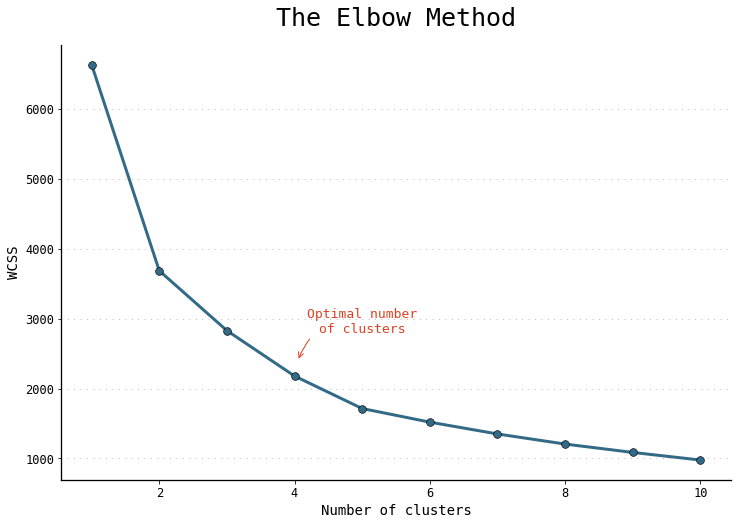

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(data_clustring)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 14, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 14, fontname = 'monospace')
plt.xticks(size = 12, fontname = 'monospace')
plt.yticks(size = 12, fontname = 'monospace')

for j in ['right', 'top']:
    a.spines[j].set_visible(False)
a.spines['bottom'].set_linewidth(1.3)
a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(data_clustring)
labels = gmm.predict(data_clustring)

data['Cluster'] = labels
data_re_clust = {
    0: 'Ordinary client',
    1: 'Elite client',
    2: 'Good client',
    3: 'Potential good client'
}
data['Cluster'] = data['Cluster'].map(data_re_clust)

In [ ]:
import plotly.express as px
fig = px.pie(data['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of clients <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

In [ ]:
import plotly.graph_objs as go
plot = go.Figure()

colors = ['#b4b4b4', '#dd4124', '#009473', '#336b87']
names = ['Ordinary client', 'Elite client', 'Good client', 'Potential good client']

for i in range(4):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = data.query("Cluster == @cl")['NumAllPurchases'],
                                y = data.query("Cluster == @cl")['AverageCheck'],
                                z = data.query("Cluster == @cl")['Days_is_client'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Purchases: %{x} <br>Average Check: %{y} <br>Days is client: %{z}')

plot.update_layout(width = 800, height = 800, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Count of purchases', titlefont_color = 'black'),
                                yaxis = dict(title = 'Average check', titlefont_color = 'black'),
                                zaxis = dict(title = 'Days is client', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 12),
                   title_text = 'Customers clusters', title_x = 0.5)

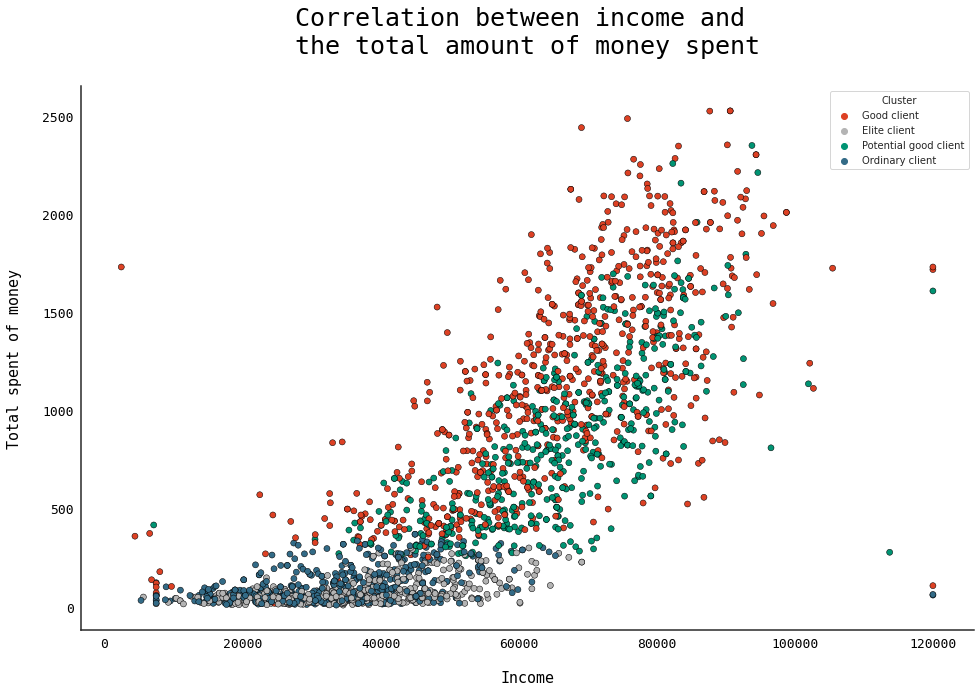

In [ ]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between income and 
the total amount of money spent''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = data, x = "Income", y = "MntTotal", hue = "Cluster", palette = ['#dd4124', '#b4b4b4', '#009473', '#336b87'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 13, color = 'black')
plt.yticks(fontname = 'monospace', size = 13, color = 'black')
plt.xlabel('Income', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Total spent of money', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

In [ ]:
import matplotlib.lines as lines
data = data.rename(columns = {'MntWines': 'Wines', 
                       'MntFruits': 'Fruits', 
                       'MntMeatProducts': 'Meat', 
                       'MntFishProducts': 'Fish', 
                       'MntSweetProducts': 'Sweet', 
                       'MntGoldProds': 'Gold'})

cl = ['Ordinary client', 'Potential good client', 'Good client', 'Elite client']
colors = {
    'Ordinary client': '#b4b4b4',
    'Potential good client': '#336b87',
    'Good client': '#009473',
    'Elite client': '#dd4124'
}

fig = plt.figure(figsize = (13, 15))
p = 1
for i in range(len(data.columns.tolist()[4:10])):
    for k in cl:
        plt.subplot(6, 4, p)
        sns.set_style("white")
        a = sns.kdeplot(data.query("Cluster == @k")[data.columns.tolist()[4:10][i]], color = colors[k], alpha = 1, shade = True, linewidth = 1.3, edgecolor = 'black')
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)
        p += 1  

plt.figtext(0., 1.11, 'Distribution of purchases by clusters and product categories', fontname = 'monospace', size = 28.5, color = 'black')        

plt.figtext(0.035, 1.03, 'Ordinary', fontname = 'monospace', size = 20, color = '#b4b4b4')      
plt.figtext(0.28, 1.03, 'Potential good', fontname = 'monospace', size = 20, color = '#336b87') 
plt.figtext(0.59, 1.03, 'Good', fontname = 'monospace', size = 20, color = '#009473') 
plt.figtext(0.83, 1.03, 'Elite', fontname = 'monospace', size = 20, color = '#dd4124') 

plt.figtext(1.015, 0.98, 'Wines', fontname = 'monospace', size = 20)   
plt.figtext(1.01, 0.814, 'Fruits', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.648, 'Meat', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.482, 'Fish', fontname = 'monospace', size = 20)
plt.figtext(1.012, 0.316, 'Sweet', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.15, 'Gold', fontname = 'monospace', size = 20)

l1 = lines.Line2D([0.99, 0.99], [1.08, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l1])
l2 = lines.Line2D([0.0, 1.1], [1, 1], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l2])
l3 = lines.Line2D([0.991, 1.1], [1, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l3])
l4 = lines.Line2D([0, 1.1], [1.08, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l4])
l5 = lines.Line2D([1.1, 1.1], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l5])
l6 = lines.Line2D([0, 0], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l6])
l7 = lines.Line2D([0, 1.1], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l7])
l8 = lines.Line2D([0, 1.1], [0.84, 0.84], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l8])
l9 = lines.Line2D([0, 1.1], [0.674, 0.674], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l9])
l10 = lines.Line2D([0, 1.1], [0.508, 0.508], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l10])
l11 = lines.Line2D([0, 1.1], [0.342, 0.342], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l11])
l12 = lines.Line2D([0, 1.1], [0.176, 0.176], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l12])
l13 = lines.Line2D([0.25, 0.25], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l13])
l14 = lines.Line2D([0.495, 0.495], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l14])
l15 = lines.Line2D([0.745, 0.745], [0, 1.08], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l15])

plt.figtext(1.027, 1.02, '''Customers
clusters''', fontname = 'monospace', size = 12, rotation = 41, ha = 'center')   
plt.figtext(1.025, 1.003, '''Products
category''', fontname = 'monospace', size = 12, rotation = 41)

y = 0.94
for i in range(6):
    plt.figtext(0.998, y, 'mean values:', fontname = 'monospace', size = 13)
    y -= 0.1666
    
y = 0.92
for i in data.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(data.query("Cluster == 'Ordinary client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#b4b4b4')
    y -= 0.1666
    
y = 0.9
for i in data.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(data.query("Cluster == 'Potential good client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#336b87')
    y -= 0.1666
    
y = 0.88
for i in data.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(data.query("Cluster == 'Good client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#009473')
    y -= 0.1666
    
y = 0.86
for i in data.columns.tolist()[4:10]:
    plt.figtext(1.027, y, round(data.query("Cluster == 'Elite client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#dd4124')
    y -= 0.1666

fig.tight_layout(h_pad = 2)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 12))
k = 1

for i in cl:
    ass = data.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i],
                   linestyle = "-", linewidth = 1,
                   edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 11,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top']:
        a.spines[j].set_visible(False)
    for j in ['bottom', 'left']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    
plt.figtext(0.05, -0.05, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.05, -0.14, '''We are definitely dealing with a store that sells very good wine, which is almost equally bought by all clusters
of buyers. In general, there are no major differences, except that customers from ordinary and potential
good clusters are more likely to buy gold and customers from good and elite clusters are more likely to
buy meat more often.''', fontname = 'monospace', size = 14, color = 'black')
    
plt.figtext(0.2, 1.05, 'What do customers from different clusters buy?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.barplot(x = 'Cmp', y = 'value', hue = 'Cluster',
            data = data.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'}),
            dodge = False, palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87'])
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')
for j in ['right', 'top']:
    a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.figtext(0.12, 0.01, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.12, -0.14, '''The best marketing campaigns were the first, fifth and last. The worst results were in the second
campaign. The cluster of elite clients shows the greatest activity. This is a rather strange
trend, because clients with low income are more likely to participate in promotions. Ordinary
customers were not generally interested in any campaign. I dare to assume that we have
information about a fairly good store for wealthy people. In the future, based on these
results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()

In [ ]:
fig = plt.figure(figsize = (13, 6))
plt.title('Who most often complains about the service?', size = 25, x = 0.17, y = 1.1)
a = sns.barplot(data = data.groupby(['Cluster']).agg({'Response': 'sum'}).reset_index(), 
                x = 'Response', y = 'Cluster')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(width - 7, p.get_y() + 0.55*p.get_height(), f'{width: .0f}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 18, color = 'white')
    plt.text(8 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 334) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    if p.get_width() == 189:
        p.set_color('#dd4124')
    elif p.get_width() == 54:
        p.set_color('#009473')
    elif p.get_width() == 66:
        p.set_color('#336b87')
    else:
        p.set_color('#b4b4b4')
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

l1 = lines.Line2D([-0.1, 0.95], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(-0.05, -0.1, 'What is the percentage of dissatisfied customers for each cluster?', fontname = 'monospace', size = 23, color = 'black')

x = 0
cl = 0
colors = ['#dd4124', '#009473', '#336b87', '#b4b4b4']
for i in round(data.groupby(['Cluster']).agg({'Response': 'mean'}).reset_index()['Response'] * 100, 1):
    plt.figtext(x, -0.18, f'{i}%', fontname = 'monospace', size = 23, color = colors[cl])
    x += 0.25
    cl += 1

l2 = lines.Line2D([-0.1, 0.95], [-0.25, -0.25], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(-0.05, -0.33, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(-0.05, -0.48, '''More than half of the complaints come from a cluster of elite customers, more than 1/4 of the customers
from this cluster have complained in the last two years, which is a big indicator.
The number of complaints for the remaining clusters is within the normal range.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()